
#**Sử dụng những model Machine learning cơ bản, deep learning cơ bản để dự đoán chỉ số bụi mịn PM2.5 dự trên tập dữ liệu chất lượng không khí tỉnh Quảng Đông qua nhiều năm.**





In [81]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [82]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'  # Thay 'file.csv' bằng đường dẫn và tên file CSV của bạn
data = pd.read_csv(file_path)

# In dữ liệu
print(data.head(5))  # Hoặc thực hiện các thao tác khác với dữ liệu đã đọc


   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [83]:
df = data.copy(deep=True)

In [84]:
print(data.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


In [85]:
row = data[data['PM2.5'].isnull()]
row

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1095,1096,2013,4,15,15,NaN,172.0,63.0,40.0,1899.0,107.0,18.6,993.5,2.0,0.0,ESE,2.3,Wanshouxigong
1142,1143,2013,4,17,14,NaN,61.0,20.0,21.0,800.0,92.0,17.1,1001.4,-2.1,0.0,S,1.2,Wanshouxigong
1816,1817,2013,5,15,16,NaN,23.0,28.0,18.0,NaN,NaN,26.8,1007.8,8.2,0.0,WSW,2.3,Wanshouxigong
2293,2294,2013,6,4,13,NaN,143.0,75.0,56.0,3399.0,68.0,22.8,1005.3,15.4,0.0,E,2.1,Wanshouxigong
2294,2295,2013,6,4,14,NaN,146.0,14.0,13.0,2799.0,57.0,20.7,1005.8,16.7,0.0,NE,2.9,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34992,34993,2017,2,26,0,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1020.7,-8.6,0.0,NNE,1.0,Wanshouxigong
35005,35006,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
35027,35028,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


In [86]:
nan_rows = data[data.isna().any(axis=1)]
nan_rows


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
98,99,2013,3,5,2,107.0,138.0,NaN,56.0,1399.0,87.0,2.3,1013.5,-7.9,0.0,W,0.9,Wanshouxigong
99,100,2013,3,5,3,114.0,130.0,4.0,59.0,NaN,87.0,-0.4,1013.0,-7.7,0.0,WSW,1.1,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
35029,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
35054,35055,2017,2,28,14,3.0,6.0,NaN,5.0,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
35055,35056,2017,2,28,15,11.0,21.0,2.0,5.0,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


In [87]:
data = data.dropna(subset=['PM2.5'])


In [88]:
data.shape

(34368, 18)

In [89]:
print(data.isnull().sum())

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10        17
SO2        242
NO2        331
CO         872
O3         686
TEMP        19
PRES        19
DEWP        19
RAIN        19
wd          78
WSPM        13
station      0
dtype: int64


In [90]:
print(data['wd'].unique())

['WNW' 'NW' 'NE' 'NNE' 'ENE' 'N' 'ESE' 'NNW' 'E' 'WSW' 'W' 'SW' 'SSW' 'SE'
 'S' 'SSE' nan]


In [91]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['wd'])
print(one_hot_encoded_data)

          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  \
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  ...   
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  ...   
2          3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  ...   
3          4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN  ...   
4          5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  ...   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...  ...   
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  ...   
35060  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  ...   
35061  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  ...   
35062  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  ...   
35063  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  ...   

       wd_NNW  wd_NW  wd_S  wd_SE  wd_SSE  wd_SSW wd_SW  wd_W  wd_WNW  wd_WSW  
0      

In [92]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34368 entries, 0 to 35063
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       34368 non-null  int64  
 1   year     34368 non-null  int64  
 2   month    34368 non-null  int64  
 3   day      34368 non-null  int64  
 4   hour     34368 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34351 non-null  float64
 7   SO2      34126 non-null  float64
 8   NO2      34037 non-null  float64
 9   CO       33496 non-null  float64
 10  O3       33682 non-null  float64
 11  TEMP     34349 non-null  float64
 12  PRES     34349 non-null  float64
 13  DEWP     34349 non-null  float64
 14  RAIN     34349 non-null  float64
 15  WSPM     34355 non-null  float64
 16  station  34368 non-null  object 
 17  wd_E     34368 non-null  uint8  
 18  wd_ENE   34368 non-null  uint8  
 19  wd_ESE   34368 non-null  uint8  
 20  wd_N     34368 non-null  uint8  
 21  wd_NE    343

In [93]:
data = pd.get_dummies(one_hot_encoded_data, columns = ['year','month','day','hour'])
print(data)

          No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  ...  \
0          1    9.0   9.0  6.0  17.0  200.0  62.0   0.3  1021.9 -19.0  ...   
1          2   11.0  11.0  7.0  14.0  200.0  66.0  -0.1  1022.4 -19.3  ...   
2          3    8.0   8.0  NaN  16.0  200.0  59.0  -0.6  1022.6 -19.7  ...   
3          4    8.0   8.0  3.0  16.0    NaN   NaN  -0.7  1023.5 -20.9  ...   
4          5    8.0   8.0  3.0   NaN  300.0  36.0  -0.9  1024.1 -21.7  ...   
...      ...    ...   ...  ...   ...    ...   ...   ...     ...   ...  ...   
35059  35060   11.0  32.0  3.0  24.0  400.0  72.0  12.5  1013.5 -16.2  ...   
35060  35061   13.0  32.0  3.0  41.0  500.0  50.0  11.6  1013.6 -15.1  ...   
35061  35062   14.0  28.0  4.0  38.0  500.0  54.0  10.8  1014.2 -13.3  ...   
35062  35063   12.0  23.0  4.0  30.0  400.0  59.0  10.5  1014.4 -12.9  ...   
35063  35064   13.0  19.0  4.0  38.0  600.0  49.0   8.6  1014.1 -15.9  ...   

       hour_14  hour_15 hour_16  hour_17  hour_18  hour_19  hou

In [94]:
data = data.drop(columns = ['station','No'])


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34368 entries, 0 to 35063
Data columns (total 99 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM2.5      34368 non-null  float64
 1   PM10       34351 non-null  float64
 2   SO2        34126 non-null  float64
 3   NO2        34037 non-null  float64
 4   CO         33496 non-null  float64
 5   O3         33682 non-null  float64
 6   TEMP       34349 non-null  float64
 7   PRES       34349 non-null  float64
 8   DEWP       34349 non-null  float64
 9   RAIN       34349 non-null  float64
 10  WSPM       34355 non-null  float64
 11  wd_E       34368 non-null  uint8  
 12  wd_ENE     34368 non-null  uint8  
 13  wd_ESE     34368 non-null  uint8  
 14  wd_N       34368 non-null  uint8  
 15  wd_NE      34368 non-null  uint8  
 16  wd_NNE     34368 non-null  uint8  
 17  wd_NNW     34368 non-null  uint8  
 18  wd_NW      34368 non-null  uint8  
 19  wd_S       34368 non-null  uint8  
 20  wd_SE 

In [96]:
data = data.fillna(data.mean())
print(data.isnull().sum())

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
          ..
hour_19    0
hour_20    0
hour_21    0
hour_22    0
hour_23    0
Length: 99, dtype: int64


In [97]:
cl = {'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM','PM2.5'}

In [98]:
crr = data[cl].corr()
crr

<ipython-input-98-cc63bef785e7>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  crr = data[cl].corr()


,NO2,RAIN,PM2.5,TEMP,O3,DEWP,PM10,WSPM,CO,SO2,PRES
NO2,1.000000,-0.047358,0.693419,-0.303654,-0.514888,-0.024830,0.677434,-0.472481,0.734768,0.485855,0.136382
RAIN,-0.047358,1.000000,-0.020927,0.039482,0.022674,0.089111,-0.033133,0.031026,-0.015269,-0.043010,-0.063899
PM2.5,0.693419,-0.020927,1.000000,-0.183926,-0.188363,0.076077,0.885726,-0.298259,0.798472,0.499703,0.031718
TEMP,-0.303654,0.039482,-0.183926,1.000000,0.611784,0.818028,-0.144894,0.057651,-0.329523,-0.347659,-0.827662
O3,-0.514888,0.022674,-0.188363,0.611784,1.000000,0.329299,-0.142348,0.313465,-0.325366,-0.185508,-0.448863
DEWP,-0.024830,0.089111,0.076077,0.818028,0.329299,1.000000,0.044469,-0.280753,-0.044240,-0.284472,-0.769447
PM10,0.677434,-0.033133,0.885726,-0.144894,-0.142348,0.044469,1.000000,-0.234718,0.724833,0.502391,-0.004638
WSPM,-0.472481,0.031026,-0.298259,0.057651,0.313465,-0.280753,-0.234718,1.000000,-0.336916,-0.135226,0.057632
CO,0.734768,-0.015269,0.798472,-0.329523,-0.325366,-0.044240,0.724833,-0.336916,1.000000,0.553832,0.156189
SO2,0.485855,-0.043010,0.499703,-0.347659,-0.185508,-0.284472,0.502391,-0.135226,0.553832,1.000000,0.195132


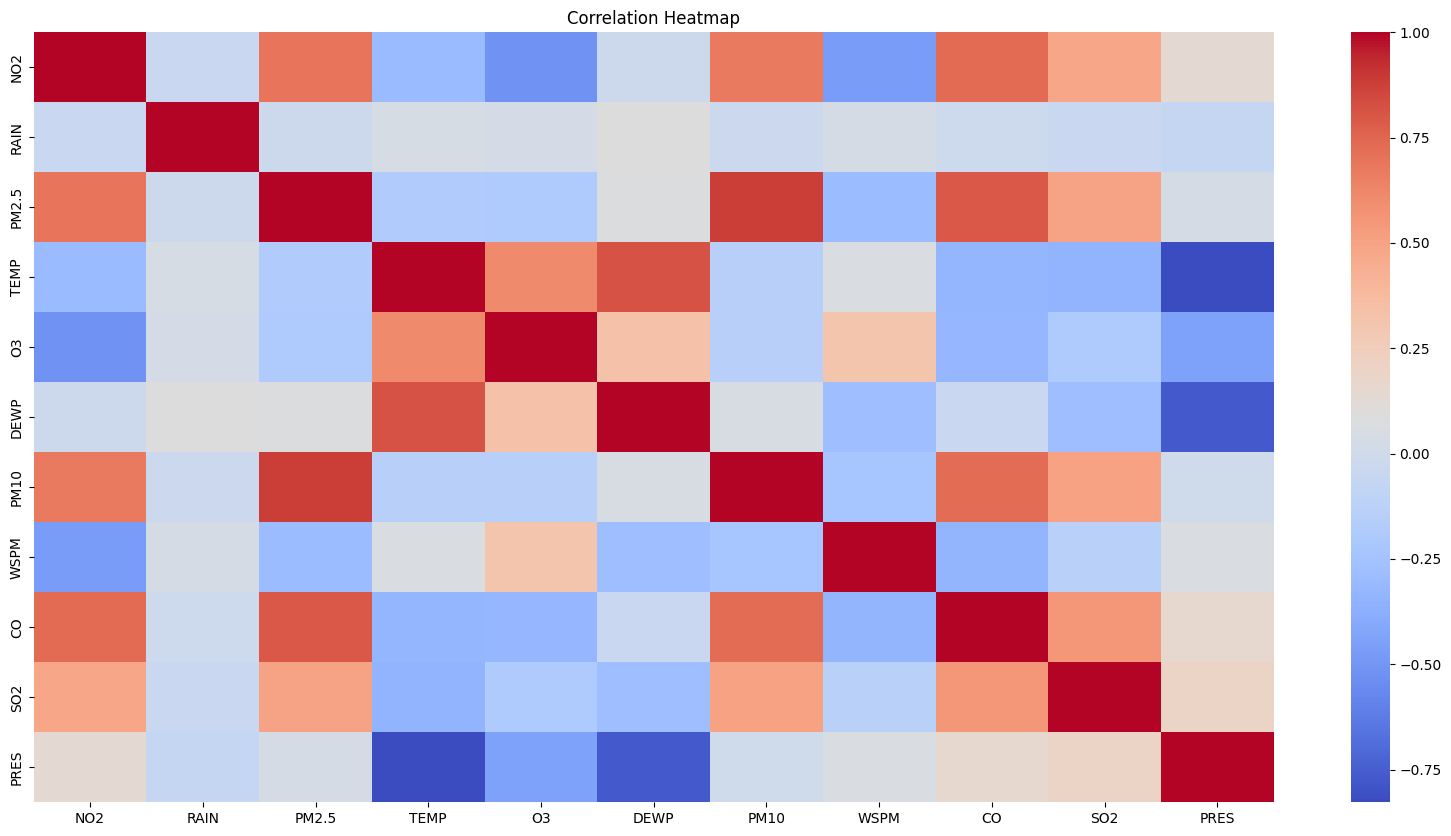

In [99]:
import seaborn as sns
import pandas as pd
# Tạo heatmap từ ma trận correlation
plt.figure(figsize=(20, 10))
sns.heatmap(crr, cmap='coolwarm', fmt=".2f")  # cmap có thể được thay đổi tùy ý
plt.title('Correlation Heatmap')
plt.show()

In [100]:
data.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE',
       'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W',
       'wd_WNW', 'wd_WSW', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hou

In [101]:
colum = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']


In [102]:
print(data['PM10'][8])
crr1 = data.corr()
crr1

6.0


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
PM2.5,1.000000,0.885726,0.499703,0.693419,0.798472,-0.188363,-0.183926,0.031718,0.076077,-0.020927,...,-0.016023,-0.019639,-0.017871,-0.014550,-0.006091,0.005759,0.018365,0.025986,0.024952,0.023642
PM10,0.885726,1.000000,0.502391,0.677434,0.724833,-0.142348,-0.144894,-0.004638,0.044469,-0.033133,...,-0.025684,-0.023365,-0.014491,-0.004136,0.013797,0.030457,0.044817,0.048410,0.039936,0.031624
SO2,0.499703,0.502391,1.000000,0.485855,0.553832,-0.185508,-0.347659,0.195132,-0.284472,-0.043010,...,0.018895,0.012498,0.005358,-0.000345,-0.005948,-0.008064,-0.008017,-0.008084,-0.005823,-0.004730
NO2,0.693419,0.677434,0.485855,1.000000,0.734768,-0.514888,-0.303654,0.136382,-0.024830,-0.047358,...,-0.087334,-0.094166,-0.089830,-0.068105,-0.029563,0.010121,0.043061,0.063384,0.067210,0.062849
CO,0.798472,0.724833,0.553832,0.734768,1.000000,-0.325366,-0.329523,0.156189,-0.044240,-0.015269,...,-0.040576,-0.044278,-0.045527,-0.038304,-0.024055,-0.007393,0.009243,0.021696,0.026501,0.026595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hour_19,0.005759,0.030457,-0.008064,0.010121,-0.007393,0.080461,0.018183,-0.013578,0.001024,0.005240,...,-0.043431,-0.043367,-0.043272,-0.043431,-0.043383,1.000000,-0.043510,-0.043478,-0.043431,-0.043510
hour_20,0.018365,0.044817,-0.008017,0.043061,0.009243,0.033257,0.003399,-0.002924,0.005481,0.011747,...,-0.043557,-0.043494,-0.043398,-0.043557,-0.043510,-0.043510,1.000000,-0.043605,-0.043557,-0.043637
hour_21,0.025986,0.048410,-0.008084,0.063384,0.021696,-0.008997,-0.009601,0.003836,0.008580,-0.001034,...,-0.043526,-0.043462,-0.043367,-0.043526,-0.043478,-0.043478,-0.043605,1.000000,-0.043526,-0.043605
hour_22,0.024952,0.039936,-0.005823,0.067210,0.026501,-0.034083,-0.019678,0.006165,0.010347,0.003114,...,-0.043478,-0.043415,-0.043320,-0.043478,-0.043431,-0.043431,-0.043557,-0.043526,1.000000,-0.043557


In [103]:

crr = data.corr()
crr





,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
PM2.5,1.000000,0.885726,0.499703,0.693419,0.798472,-0.188363,-0.183926,0.031718,0.076077,-0.020927,...,-0.016023,-0.019639,-0.017871,-0.014550,-0.006091,0.005759,0.018365,0.025986,0.024952,0.023642
PM10,0.885726,1.000000,0.502391,0.677434,0.724833,-0.142348,-0.144894,-0.004638,0.044469,-0.033133,...,-0.025684,-0.023365,-0.014491,-0.004136,0.013797,0.030457,0.044817,0.048410,0.039936,0.031624
SO2,0.499703,0.502391,1.000000,0.485855,0.553832,-0.185508,-0.347659,0.195132,-0.284472,-0.043010,...,0.018895,0.012498,0.005358,-0.000345,-0.005948,-0.008064,-0.008017,-0.008084,-0.005823,-0.004730
NO2,0.693419,0.677434,0.485855,1.000000,0.734768,-0.514888,-0.303654,0.136382,-0.024830,-0.047358,...,-0.087334,-0.094166,-0.089830,-0.068105,-0.029563,0.010121,0.043061,0.063384,0.067210,0.062849
CO,0.798472,0.724833,0.553832,0.734768,1.000000,-0.325366,-0.329523,0.156189,-0.044240,-0.015269,...,-0.040576,-0.044278,-0.045527,-0.038304,-0.024055,-0.007393,0.009243,0.021696,0.026501,0.026595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hour_19,0.005759,0.030457,-0.008064,0.010121,-0.007393,0.080461,0.018183,-0.013578,0.001024,0.005240,...,-0.043431,-0.043367,-0.043272,-0.043431,-0.043383,1.000000,-0.043510,-0.043478,-0.043431,-0.043510
hour_20,0.018365,0.044817,-0.008017,0.043061,0.009243,0.033257,0.003399,-0.002924,0.005481,0.011747,...,-0.043557,-0.043494,-0.043398,-0.043557,-0.043510,-0.043510,1.000000,-0.043605,-0.043557,-0.043637
hour_21,0.025986,0.048410,-0.008084,0.063384,0.021696,-0.008997,-0.009601,0.003836,0.008580,-0.001034,...,-0.043526,-0.043462,-0.043367,-0.043526,-0.043478,-0.043478,-0.043605,1.000000,-0.043526,-0.043605
hour_22,0.024952,0.039936,-0.005823,0.067210,0.026501,-0.034083,-0.019678,0.006165,0.010347,0.003114,...,-0.043478,-0.043415,-0.043320,-0.043478,-0.043431,-0.043431,-0.043557,-0.043526,1.000000,-0.043557


In [104]:
features = data[colum]
target = data['PM2.5']

In [105]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập test + validation (80-10-10)
X_train, X_test_val, y_train, y_test_val = train_test_split(features, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)




In [106]:
X_train

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
21478,164.0,6.0,34.0,1000.0,162.0000,30.1,1000.9,21.5,0.0,2.0
13672,108.0,17.0,37.0,2200.0,145.0000,24.5,1009.7,16.5,0.0,1.7
15814,19.0,7.0,36.0,500.0,25.0000,-0.8,1026.0,-18.9,0.0,2.4
34552,46.0,16.0,24.0,700.0,62.0000,2.9,1025.2,-10.4,0.0,1.6
15910,34.0,23.0,70.0,900.0,10.0000,5.7,1019.0,-16.2,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...
17106,38.0,6.0,26.0,400.0,82.0000,7.0,1009.0,-15.8,0.0,1.7
6305,18.0,4.0,14.0,300.0,35.5572,6.3,1018.8,-14.5,0.0,2.6
11427,48.0,2.0,28.0,1000.0,67.0000,19.5,1000.2,18.8,1.0,0.8
860,12.0,3.0,14.0,400.0,73.0000,7.5,1016.8,-9.4,0.0,2.2


In [107]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


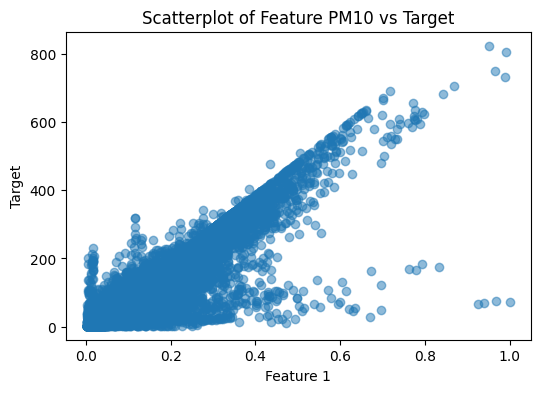

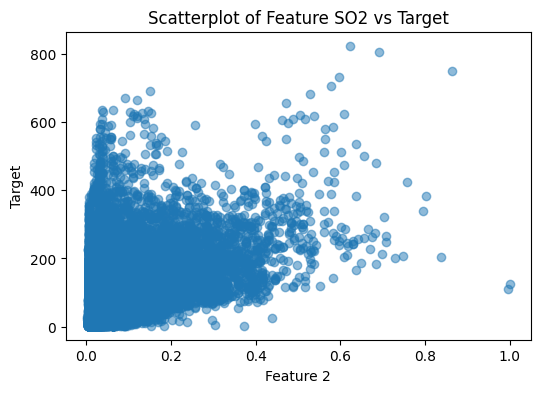

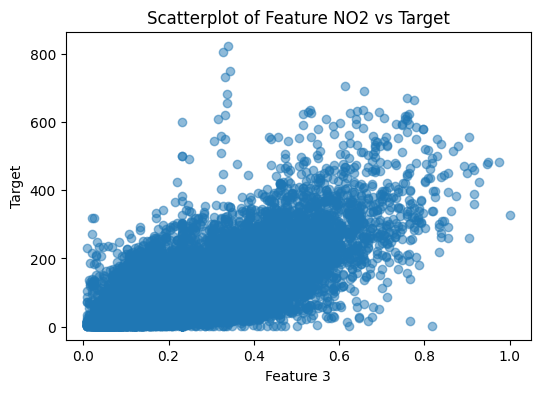

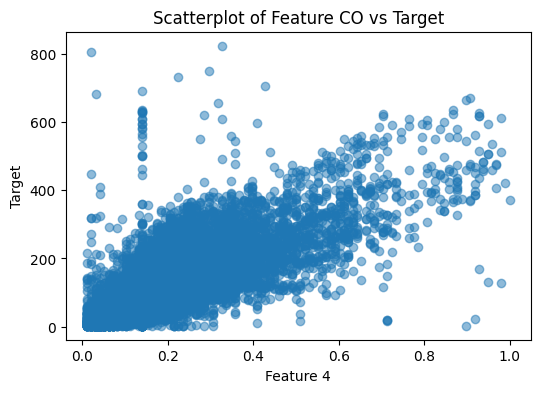

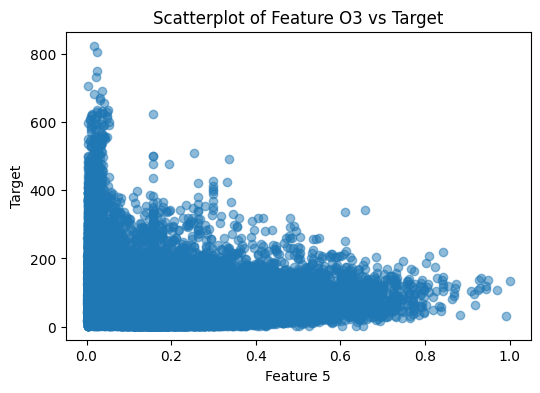

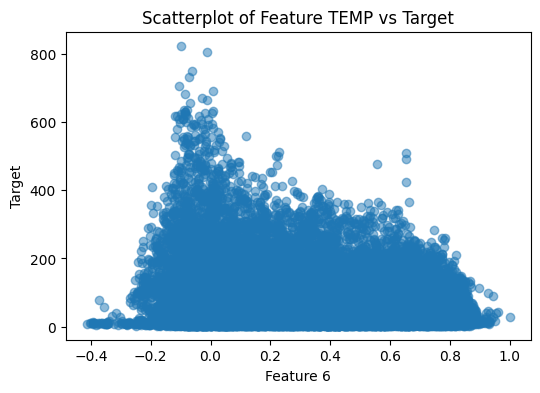

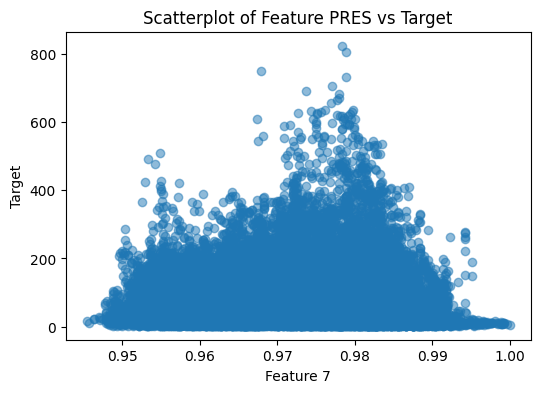

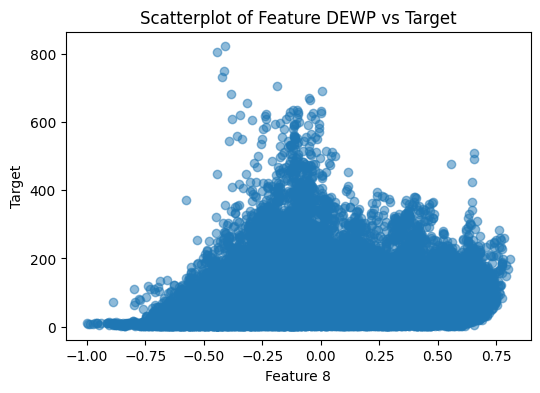

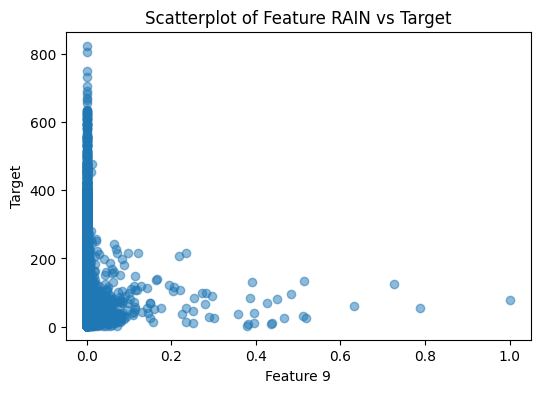

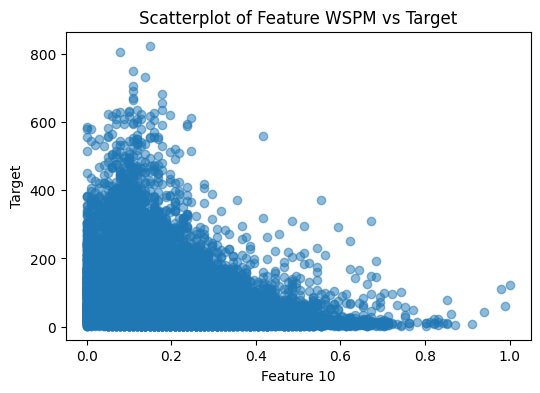

In [108]:
num_features = X_train_scaled.shape[1]

# Vẽ scatterplot cho từng feature
for i in range(num_features):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train_scaled[:, i], y_train, alpha=0.5)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Scatterplot of Feature {colum[i]} vs Target')
    plt.show()

# **Sử dụng model Polynomial Ridge Regression**

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5)
X_poly_train_scaled = poly_features.fit_transform(X_train_scaled)
X_poly_val_scaled = poly_features.fit_transform(X_val_scaled)
X_poly_test_scaled = poly_features.fit_transform(X_test_scaled)

#alpha_values = [4.1]
alpha_values = [4.0,4.1,4.2,4.3,4.4,4.5]  # Danh sách các giá trị alpha để thử nghiệm
best_alpha = None
best_val_score = float('inf')

for alpha_value in alpha_values:
    print(alpha_value)
    ridge = Ridge(alpha=alpha_value)
    ridge.fit(X_poly_train_scaled, y_train)

    # Đánh giá mô hình trên tập validation
    y_val_pred = ridge.predict(X_poly_val_scaled)
    val_score = mean_squared_error(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)

    print(f"Alpha = {alpha_value}: MSE = {mse:.4f}, R^2 = {r2:.4f}")

    # Lưu giữ giá trị alpha tốt nhất
    if val_score < best_val_score:
        best_val_score = val_score
        best_alpha = alpha_value

# Fit lại mô hình với alpha tốt nhất sử dụng cả tập huấn luyện và tập validation
print(best_alpha)
ridge = Ridge(alpha=best_alpha)
ridge.fit(np.vstack((X_poly_train_scaled, X_poly_val_scaled)), np.concatenate((y_train, y_val)))
y_pred = ridge.predict(X_poly_test_scaled)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mse_test)
mae = mean_absolute_error(y_test, y_pred)
mre = np.mean(np.abs((y_test - y_pred) / y_test))
print(f"Mean Squared Error on Test Set: {mse_test:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse: .4f} ")
print(f"Mean Absolute Error on Test Set: {mae: .4f} ")
print(f'Mean Relative Error (MRE): {mre:.4f}')
print(f"R2 Score: {r2_test: .4f}")


4.0
Alpha = 4.0: MSE = 897.3621, R^2 = 0.8824
4.1
Alpha = 4.1: MSE = 897.6367, R^2 = 0.8824
4.2
Alpha = 4.2: MSE = 897.9098, R^2 = 0.8823
4.3
Alpha = 4.3: MSE = 898.1814, R^2 = 0.8823
4.4
Alpha = 4.4: MSE = 898.4517, R^2 = 0.8822
4.5
Alpha = 4.5: MSE = 898.7207, R^2 = 0.8822
4.0
Mean Squared Error on Test Set: 938.1033
Root Mean Squared Error on Test Set:  30.6285 
Mean Absolute Error on Test Set:  18.0299 
Mean Relative Error (MRE): 0.4632
R2 Score:  0.8715


In [110]:
XX = [i*0.1 for i in range(5156)]

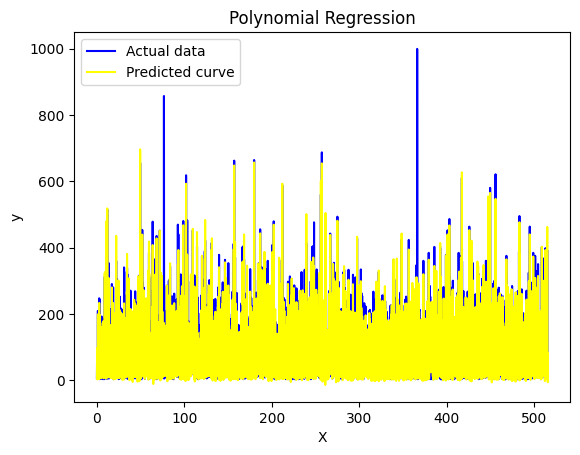

In [111]:
import matplotlib.pyplot as plt
plt.plot(XX, y_test, color='blue', label='Actual data')
plt.plot(XX, y_pred, color='yellow', label='Predicted curve')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


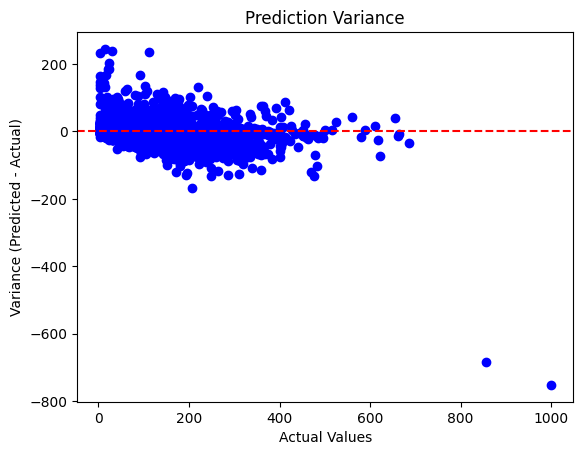

In [112]:
variance = y_pred - y_test

# Vẽ biểu đồ đám mây biểu diễn sự biến thiên
plt.scatter(y_test, variance, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Đường thẳng màu đỏ ở trục y=0

# Thêm các thông tin khác cho biểu đồ
plt.title('Prediction Variance')
plt.xlabel('Actual Values')
plt.ylabel('Variance (Predicted - Actual)')
plt.show()

In [113]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='rbf')
svr.fit(np.vstack((X_train_scaled, X_val_scaled)), np.concatenate((y_train, y_val)))


# Predicting on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluation (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse_test)
mae = mean_absolute_error(y_test, y_pred)
mre = np.mean(np.abs((y_test - y_pred) / y_test))

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse: .4f} ")
print(f"Mean Absolute Error on Test Set: {mae: .4f} ")
print(f'Mean Relative Error (MRE): {mre:.4f}')
print(f"R2 Score: {r2: .4f}")

Mean Squared Error on Test Set: 1387.7310
Root Mean Squared Error on Test Set:  30.6285 
Mean Absolute Error on Test Set:  21.1892 
Mean Relative Error (MRE): 0.4985
R2 Score:  0.8099


kernel = rbf (GAUSSIAN)

Mean Squared Error: 1422.8757095228807

R-squared Score: 0.8051133547093026

kernel = linear

Mean Squared Error: 1455.3874997294736

R-squared Score: 0.8006603208403903

kernel = poly

Mean Squared Error: 1242.258909090952


R-squared Score: 0.8298518487912074



In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

#**Sử dụng model multilayer perceptron**

In [115]:

y_train_MLP = y_train.values
y_test_MLP = y_test.values

In [116]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_MLP, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_MLP,dtype=torch.float32)



In [117]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 256 )
        self.re2 = nn.ReLU()
        self.fc3 = nn.Linear(256,output_size)



    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.re2(out)
        out = self.fc3(out)

        return out

In [118]:
input_size = 10
output_size = 1
model = MLP(input_size, output_size)

In [119]:
criterion = nn.MSELoss()  # Hàm mất mát Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.015)
model.train()

MLP(
  (fc1): Linear(in_features=10, out_features=128, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (re2): ReLU()
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [120]:
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    outputs = outputs.squeeze()
    loss = criterion(outputs, y_train_tensor)

    # Backward pass và tối ưu hóa
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/500], Loss: 14558.4082
Epoch [2/500], Loss: 14347.9062
Epoch [3/500], Loss: 14016.1279
Epoch [4/500], Loss: 13464.4277
Epoch [5/500], Loss: 12651.5088
Epoch [6/500], Loss: 11560.0498
Epoch [7/500], Loss: 10221.8174
Epoch [8/500], Loss: 8756.5957
Epoch [9/500], Loss: 7434.6753
Epoch [10/500], Loss: 6745.4834
Epoch [11/500], Loss: 7135.8940
Epoch [12/500], Loss: 7861.2656
Epoch [13/500], Loss: 7808.5596
Epoch [14/500], Loss: 7115.5581
Epoch [15/500], Loss: 6308.1260
Epoch [16/500], Loss: 5729.7266
Epoch [17/500], Loss: 5457.7656
Epoch [18/500], Loss: 5396.5142
Epoch [19/500], Loss: 5403.7861
Epoch [20/500], Loss: 5369.8545
Epoch [21/500], Loss: 5238.1353
Epoch [22/500], Loss: 4997.7969
Epoch [23/500], Loss: 4672.0977
Epoch [24/500], Loss: 4309.5093
Epoch [25/500], Loss: 3973.6340
Epoch [26/500], Loss: 3724.0886
Epoch [27/500], Loss: 3584.8699
Epoch [28/500], Loss: 3515.9778
Epoch [29/500], Loss: 3430.3735
Epoch [30/500], Loss: 3262.8667
Epoch [31/500], Loss: 3019.6313
Epoch [32/

In [121]:
with torch.no_grad():
    predicted_tensor = model(X_test_tensor)

predicted_tensor= predicted_tensor.squeeze()


In [122]:
def r_squared(predicted, target):
    y_mean = torch.mean(target)
    sse = torch.sum((predicted - target) ** 2)
    sst = torch.sum((target - y_mean) ** 2)
    r2 = 1 - (sse / sst)
    return r2

In [123]:
import torch.nn.functional as F

mae = F.l1_loss(predicted_tensor, y_test_tensor)


# Tính Mean Squared Error (MSE) trên tensor
mse = F.mse_loss(predicted_tensor, y_test_tensor)


# Tính Root Mean Squared Error (RMSE) trên tensor
rmse = torch.sqrt(mse)

mre = sum(abs((y - y_hat) / y) for y, y_hat in zip(y_test_tensor, predicted_tensor)) / len(y_test_tensor)

r2 = r_squared(predicted_tensor, y_test_tensor)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse: .4f} ")
print(f"Mean Absolute Error on Test Set: {mae: .4f} ")
print(f'Mean Relative Error (MRE): {mre:.4f}')
print(f"R2 Score: {r2: .4f}")



Mean Squared Error on Test Set: 894.9193
Root Mean Squared Error on Test Set:  29.9152 
Mean Absolute Error on Test Set:  16.3857 
Mean Relative Error (MRE): 0.4054
R2 Score:  0.8774


#**Sử dụng model LSTM, dùng dữ liệu trong 23h để đoán chỉ số PM 2.5 trong giờ tiếp theo**

In [124]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [126]:
df = df.drop(columns = ['station','No','wd'])


In [127]:
print(df.isnull().sum())

year        0
month       0
day         0
hour        0
PM2.5     696
PM10      484
SO2       669
NO2       754
CO       1297
O3       1078
TEMP       19
PRES       19
DEWP       19
RAIN       19
WSPM       13
dtype: int64


In [128]:
df[colum] = df[colum].fillna(df[colum].mean())


In [129]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Thiết lập cột datetime làm cột index của DataFrame

# In ra thông tin của DataFrame với cột datetime là index
print(df.head())

   year  month  day  hour  PM2.5  PM10        SO2       NO2           CO  \
0  2013      3    1     0    9.0   9.0   6.000000  17.00000   200.000000   
1  2013      3    1     1   11.0  11.0   7.000000  14.00000   200.000000   
2  2013      3    1     2    8.0   8.0  17.148603  16.00000   200.000000   
3  2013      3    1     3    8.0   8.0   3.000000  16.00000  1370.395031   
4  2013      3    1     4    8.0   8.0   3.000000  55.52956   300.000000   

          O3  TEMP    PRES  DEWP  RAIN  WSPM            datetime  
0  62.000000   0.3  1021.9 -19.0   0.0   2.0 2013-03-01 00:00:00  
1  66.000000  -0.1  1022.4 -19.3   0.0   4.4 2013-03-01 01:00:00  
2  59.000000  -0.6  1022.6 -19.7   0.0   4.7 2013-03-01 02:00:00  
3  56.229904  -0.7  1023.5 -20.9   0.0   2.6 2013-03-01 03:00:00  
4  36.000000  -0.9  1024.1 -21.7   0.0   2.5 2013-03-01 04:00:00  


In [130]:
df = df.sort_values('datetime')



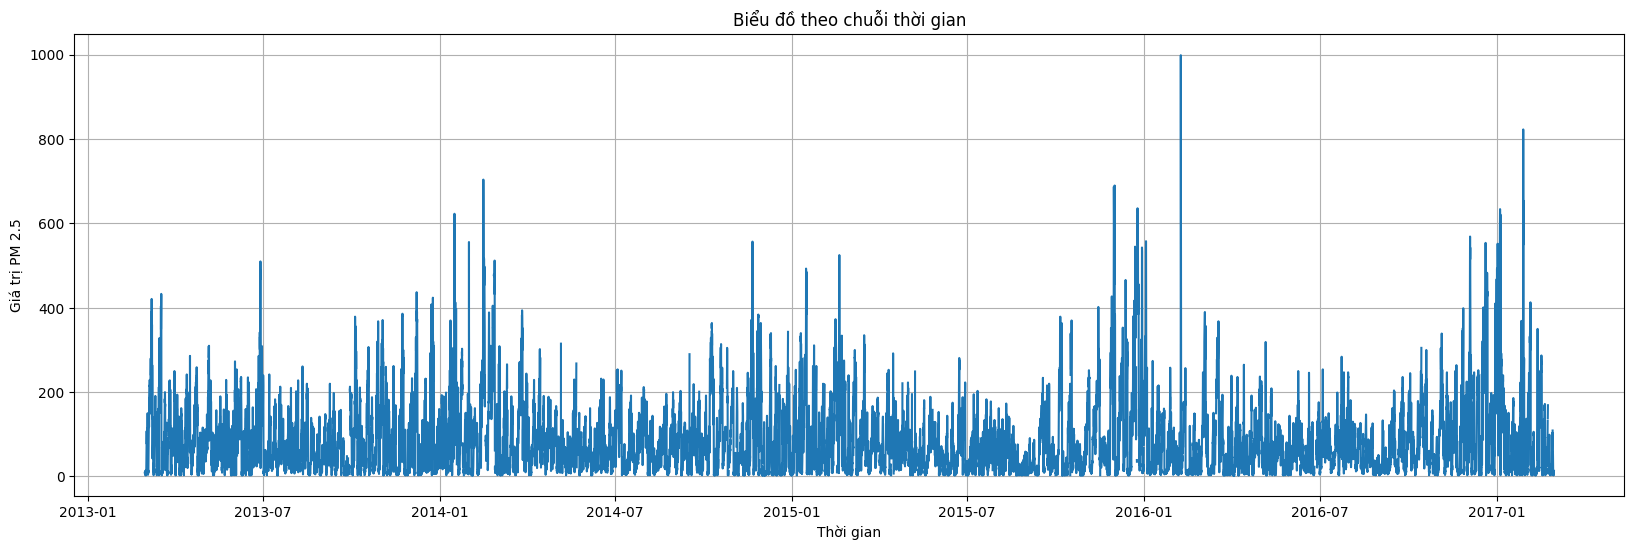

In [131]:
plt.figure(figsize=(20, 6))
plt.plot( df['datetime'],df['PM2.5'])  # Thay 'column_name' bằng tên cột bạn muốn vẽ
plt.xlabel('Thời gian')
plt.ylabel('Giá trị PM 2.5')
plt.title('Biểu đồ theo chuỗi thời gian')
plt.grid(True)
plt.show()

In [132]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
0,2013,3,1,0,9.0,9.0,6.000000,17.00000,200.000000,62.000000,0.3,1021.9,-19.0,0.0,2.0,2013-03-01 00:00:00
1,2013,3,1,1,11.0,11.0,7.000000,14.00000,200.000000,66.000000,-0.1,1022.4,-19.3,0.0,4.4,2013-03-01 01:00:00
2,2013,3,1,2,8.0,8.0,17.148603,16.00000,200.000000,59.000000,-0.6,1022.6,-19.7,0.0,4.7,2013-03-01 02:00:00
3,2013,3,1,3,8.0,8.0,3.000000,16.00000,1370.395031,56.229904,-0.7,1023.5,-20.9,0.0,2.6,2013-03-01 03:00:00
4,2013,3,1,4,8.0,8.0,3.000000,55.52956,300.000000,36.000000,-0.9,1024.1,-21.7,0.0,2.5,2013-03-01 04:00:00


In [133]:
start_date = df['datetime'].min()
end_date = df['datetime'].max()

date_range = pd.date_range(start=start_date, end=end_date, freq='D')


In [134]:
print(date_range)

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-25', '2017-02-26',
               '2017-02-27', '2017-02-28'],
              dtype='datetime64[ns]', length=1461, freq='D')


In [135]:
col = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'PM2.5']


In [136]:
df = df[col]

In [137]:
print(df.isnull().sum())

PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
PM2.5    696
dtype: int64


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    35064 non-null  float64
 1   SO2     35064 non-null  float64
 2   NO2     35064 non-null  float64
 3   CO      35064 non-null  float64
 4   O3      35064 non-null  float64
 5   TEMP    35064 non-null  float64
 6   PRES    35064 non-null  float64
 7   DEWP    35064 non-null  float64
 8   RAIN    35064 non-null  float64
 9   WSPM    35064 non-null  float64
 10  PM2.5   34368 non-null  float64
dtypes: float64(11)
memory usage: 3.2 MB


In [139]:
from datetime import datetime, timedelta,time



In [140]:
sequence = []
target = []

seq_len = 23
for i in range(len(df)-(seq_len+1)):
  sequence_data = df.iloc[i:i+seq_len]
  if (not(sequence_data.isnull().values.any())) and (not(df.iloc[i+seq_len+1].isnull().values.any())):
    sequence.append(sequence_data)
    target.append(df['PM2.5'].iloc[i+seq_len+1])
print(len(sequence))


30259


In [141]:
list_tensor = [torch.tensor(df1.values, dtype=torch.float32) for df1 in sequence]
sequence_tensor = torch.stack(list_tensor)



In [142]:
target_tensor = torch.tensor(target,dtype=torch.float32)

In [143]:
from torch.utils.data import random_split

# Tạo TensorDataset từ input_tensor và output_tensor
dataset = TensorDataset(sequence_tensor, target_tensor)
# Xác định tỷ lệ phần trăm cho train, test, val
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Tính số lượng mẫu cho train, test, val
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = int(test_ratio * total_size)
val_size = total_size - train_size - test_size

# Chia tập dataset thành train, test, val
train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])




In [144]:
sequences = []
targets = []

for sequence, target in train_dataset:
    sequences.append(sequence)
    targets.append(target)

# Chuyển danh sách thành tensor nếu cần thiết
sequences_tensor = torch.stack(sequences)
targets_tensor = torch.stack(targets)

mean_sequence = torch.mean(sequences_tensor, dim=0)
variance = torch.var(sequences_tensor,dim =0)
mean_target = torch.mean(targets_tensor, dim=0)
variance_target = torch.var(targets_tensor,dim =0)
normalized_tensor = (sequences_tensor - mean_sequence) / torch.sqrt(variance)
normalized_target = (targets_tensor - mean_target) / torch.sqrt(variance_target)

train_dataset_new = TensorDataset(normalized_tensor, normalized_target)
print(mean_sequence.shape)


torch.Size([23, 11])


In [145]:
normalized_tensor.shape

torch.Size([21181, 23, 11])

In [146]:
normalized_target.shape

torch.Size([21181])

In [147]:
valid_sequences = []
valid_targets = []

for s, t in val_dataset:
    valid_sequences.append(s)
    valid_targets.append(t)

# Chuyển danh sách thành tensor nếu cần thiết
valid_sequences_tensor = torch.stack(valid_sequences)
valid_targets_tensor = torch.stack(valid_targets)
valid_normalized_tensor = (valid_sequences_tensor - mean_sequence)/torch.sqrt(variance)
valid_normalized_target = (valid_targets_tensor - mean_target) / torch.sqrt(variance_target)
val_dataset_new = TensorDataset(valid_normalized_tensor, valid_normalized_target)
valid_normalized_target





tensor([ 0.0098, -0.2575, -0.0716,  ...,  0.2305, -0.8617, -0.8617])

In [148]:
test_sequences = []
test_targets = []

for s, t in test_dataset:
    test_sequences.append(s)
    test_targets.append(t)

# Chuyển danh sách thành tensor nếu cần thiết
test_sequences_tensor = torch.stack(test_sequences)
test_targets_tensor = torch.stack(test_targets)
test_normalized_tensor = (test_sequences_tensor - mean_sequence)/torch.sqrt(variance)
test_dataset_new = TensorDataset(test_normalized_tensor, test_targets_tensor)





In [159]:
# Thiết lập batch size cho DataLoader
batch_size = 32
# Tạo DataLoader từ TensorDataset
data_loader = DataLoader(train_dataset_new, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset_new, batch_size=batch_size, shuffle=True)

In [160]:
input_size = sequence_tensor.shape[-1]  # Số lượng features trong tensor input



In [161]:
# Xây dựng mô hình LSTM
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()
        self.lstm = torch.nn.LSTM(input_size, 64, batch_first=True)
        self.fc = torch.nn.Linear(64,128 )
        self.relu1 = nn.ReLU()
        self.fc1 = torch.nn.Linear(128,256)
        self.batchnorm1 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.3)
        self.fc2 = torch.nn.Linear(256,1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # print(lstm_out.shape)
        fc_out = self.fc(lstm_out[:, -1, :])  # Lấy output của bước thời gian cuối cùng
        relu1_out = self.relu1(fc_out)
        fc1_out = self.fc1(relu1_out)
        relu2_out = self.relu2(fc1_out)
        batchnorm1_out =  self.batchnorm1
        dropout1_out = self.dropout1(relu2_out)
        fc2_out = self.fc2(dropout1_out)
        return fc2_out


In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [163]:
device

device(type='cuda')

In [164]:
from operator import mod
model = LSTMModel(input_size)
model.to(device)
criterion = torch.nn.MSELoss()  # Sử dụng Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.00003,weight_decay=1e-4)  # Sử dụng optimizer Adam
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


# Huấn luyện mô hình
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, targets in data_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        predicted = model(inputs)
        predicted = predicted.squeeze()
        loss = criterion(predicted, targets)
        loss.backward()
        #torch.nn.utils.clip_grad_value_(model.parameters(),0.005)


        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(data_loader)
    train_losses.append(epoch_train_loss)
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    for inputs_val, targets_val in val_loader:
          inputs_val, targets_val = inputs_val.to(device), targets_val.to(device)
          outputs_val = model(inputs_val)
          outputs_val = outputs_val.squeeze()
          val_loss = criterion(outputs_val, targets_val)
          running_val_loss += val_loss.item()
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')



Epoch [1/500], Train Loss: 0.6034, Val Loss: 0.2785
Epoch [2/500], Train Loss: 0.2476, Val Loss: 0.2059
Epoch [3/500], Train Loss: 0.2038, Val Loss: 0.1811
Epoch [4/500], Train Loss: 0.1785, Val Loss: 0.1670
Epoch [5/500], Train Loss: 0.1648, Val Loss: 0.1593
Epoch [6/500], Train Loss: 0.1548, Val Loss: 0.1518
Epoch [7/500], Train Loss: 0.1493, Val Loss: 0.1484
Epoch [8/500], Train Loss: 0.1438, Val Loss: 0.1455
Epoch [9/500], Train Loss: 0.1424, Val Loss: 0.1433
Epoch [10/500], Train Loss: 0.1391, Val Loss: 0.1463
Epoch [11/500], Train Loss: 0.1387, Val Loss: 0.1399
Epoch [12/500], Train Loss: 0.1368, Val Loss: 0.1391
Epoch [13/500], Train Loss: 0.1355, Val Loss: 0.1374
Epoch [14/500], Train Loss: 0.1353, Val Loss: 0.1377
Epoch [15/500], Train Loss: 0.1331, Val Loss: 0.1364
Epoch [16/500], Train Loss: 0.1311, Val Loss: 0.1346
Epoch [17/500], Train Loss: 0.1305, Val Loss: 0.1403
Epoch [18/500], Train Loss: 0.1304, Val Loss: 0.1349
Epoch [19/500], Train Loss: 0.1301, Val Loss: 0.1330
Ep

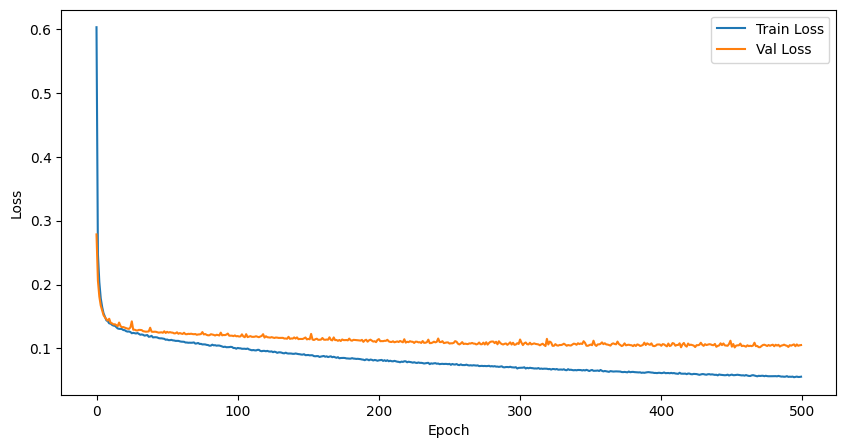

In [165]:
# Vẽ đồ thị loss và accuracy
plt.figure(figsize=(10, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [166]:
test_loader =  DataLoader(test_dataset_new, batch_size=batch_size, shuffle=True)

In [170]:

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(model, test_loader):
    model.eval()
    mse_loss = 0.0
    mre_loss = 0.0
    mae_loss =0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            outputs = outputs.squeeze()
            outputs_rescaled = outputs*torch.sqrt(variance_target) +mean_target
            #MSE
            mse_loss += mean_squared_error(targets.cpu().numpy(), outputs_rescaled.cpu().numpy())
            #MAE
            mae_loss += mean_absolute_error(targets.cpu().numpy(), outputs_rescaled.cpu().numpy())

            # MRE
            mre_loss += sum(abs((y - y_hat) / y) for y, y_hat in zip(targets.cpu().numpy(), outputs_rescaled.cpu().numpy())) / len(targets)

            y_true.extend(targets.cpu().numpy())
            y_pred.extend(outputs_rescaled.cpu().numpy())

    mse_loss /= len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    mae_loss /= len(test_loader)
    mre_loss /= len(test_loader)

    r2 = r2_score(y_true, y_pred)

    return mse_loss, rmse_loss,mae_loss, mre_loss, r2


In [171]:
# Tính các chỉ số trên tập test
mse,rmse,mae,mre, r2 = calculate_metrics(model, test_loader)

# In ra các chỉ số
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse: .4f} ")
print(f"Mean Absolute Error on Test Set: {mae: .4f} ")
print(f'Mean Relative Error (MRE): {mre:.4f}')
print(f"R2 Score: {r2: .4f}")

Mean Squared Error on Test Set: 728.7924
Root Mean Squared Error on Test Set:  26.9962 
Mean Absolute Error on Test Set:  15.4455 
Mean Relative Error (MRE): 0.3749
R2 Score:  0.8992



#**Kết luận: Thông qua các model đã triển khai, chúng ta có thể nhận thấy được các model đã dự đoán khá hiệu quả. Cụ thể:**
| Metric                          | Model Polymial Ridge Regression      | Model SVR      | Model Multilayer Perceptron       | Model LSTM + Linear     |
| ------------------------------- | ------------ | ------------ | ------------ | ------------ |
| Mean Squared Error (MSE)        | 938.1033     | 1387.7310    | 894.9193     | 728.7924     |
| Root Mean Squared Error (RMSE)   | 30.6285      | 30.6285      | 29.9152      | 26.9962      |
| Mean Absolute Error (MAE)       | 18.0299      | 21.1892      | 16.3857      | 15.4455      |
| Mean Relative Error (MRE)       | 0.4632       | 0.4985       | 0.4054       | 0.3749       |
| R2 Score                         | 0.8715       | 0.8099       | 0.8774       | 0.8992       |